#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/data'

total 2199524
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root   4052564 Feb  2 12:48 data_2020_1_12.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root    530660 Feb 18 12:59 data_2020_ml.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   1750754 Feb 20 20:31 marathon_2015_2017_qualifying.csv
-rw------- 1 root root      1349 Aug 19  2019 marathon_qualifying_time.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시가

#2. Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file = '/gdrive/My Drive/data/data_2020_1_12.csv'
data = pd.read_csv(file)

In [6]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [7]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
#101,서울(406.94) 105,기흥(387.19) 110,목천(329.91) 115,대전(271.94) 120,황간(222.38) 125,남구미(167.25) 130,동김천(192.00) 135,경주(68.26) 140,부산(0)
# Distance from Seoul : 0, 19.75, 77.03, 135, 184.56, 214.94, 239.69, 338.68, 406.94
# Distance from Seoul : 0, 20, 77, 135, 185, 240, 215, 339, 407
data['도착영업소코드'] = data['도착영업소코드'].map({105: 20, 110: 77, 115: 135, 120: 185, 125: 240, 130: 215, 135: 339, 140: 407})

In [8]:
data.rename(columns={'도착영업소코드': '거리'}, inplace=True)

In [9]:
data.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [10]:
data_destination = data[data['거리'].isin([135, 407])]

In [11]:
data_destination

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
174,20200101,10,101,135,5499,2
175,20200101,10,101,135,5329,2
176,20200101,20,101,135,5673,2
177,20200101,20,101,135,4662,2
178,20200101,4,101,135,5946,2
...,...,...,...,...,...,...
152857,20201231,17,101,407,15328,3
152860,20201231,2,101,135,4539,3
152861,20201231,20,101,407,17001,3
152862,20201231,6,101,135,4652,3


In [12]:
data_time = data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean()

In [13]:
data_time

집계시  요일  거리 
0    0   135     5072.637037
         407    15549.675676
     1   135     5051.017391
         407    15983.102564
     2   135     5450.725000
                    ...     
23   4   407    17035.450980
     5   135     5431.022556
         407    16033.622222
     6   135     5254.222973
         407    15297.022727
Name: 통행시간, Length: 336, dtype: float64

In [14]:
data_distance = data_time.unstack(level=-1)

In [15]:
data_distance

거리              135           407
집계시 요일                           
0   0   5072.637037  15549.675676
    1   5051.017391  15983.102564
    2   5450.725000  15129.750000
    3   5263.705882  14533.189189
    4   5219.400000  15908.275000
...             ...           ...
23  2   5404.398601  16006.125000
    3   5627.057554  16118.288889
    4   6017.818182  17035.450980
    5   5431.022556  16033.622222
    6   5254.222973  15297.022727

[168 rows x 2 columns]

In [16]:
data_distance.dropna()

거리              135           407
집계시 요일                           
0   0   5072.637037  15549.675676
    1   5051.017391  15983.102564
    2   5450.725000  15129.750000
    3   5263.705882  14533.189189
    4   5219.400000  15908.275000
...             ...           ...
23  2   5404.398601  16006.125000
    3   5627.057554  16118.288889
    4   6017.818182  17035.450980
    5   5431.022556  16033.622222
    6   5254.222973  15297.022727

[168 rows x 2 columns]

In [17]:
data_out = data_distance.reset_index()

In [18]:
data_out

거리,집계시,요일,135,407
0,0,0,5072.637037,15549.675676
1,0,1,5051.017391,15983.102564
2,0,2,5450.725000,15129.750000
3,0,3,5263.705882,14533.189189
4,0,4,5219.400000,15908.275000
...,...,...,...,...
163,23,2,5404.398601,16006.125000
164,23,3,5627.057554,16118.288889
165,23,4,6017.818182,17035.450980
166,23,5,5431.022556,16033.622222


In [19]:
# Dataframe to List
data_list = data_out.values.tolist()

In [20]:
# Train Data sets
x_train = [ r[:2] for r in data_list ]
y_train = [ r[2:] for r in data_list ]

In [21]:
x_train[:5], y_train[:5]

([[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0]],
 [[5072.637037037037, 15549.675675675675],
  [5051.017391304348, 15983.102564102564],
  [5450.725, 15129.75],
  [5263.705882352941, 14533.18918918919],
  [5219.4, 15908.275]])

#3. Multi Variable and Output using Tensorflow

In [22]:
import tensorflow as tf
import numpy as np

In [23]:
learning_rate = 1e-4
learning_epochs = 5000

In [24]:
# Stochastic gradient descent (SGD) Optimizer
sgd =  tf.keras.optimizers.SGD(learning_rate=learning_rate)
# Mean Square Error (MSE) loss function
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2,)))

model.compile(loss=mse, optimizer=sgd)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(x_train, y_train, epochs=learning_epochs)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 2501/5000
6/6 [==============================] - 0s 2ms/step - loss: 12443789.8571
Epoch 2502/5000
6/6 [==============================] - 0s 2ms/step - loss: 12705641.1429
Epoch 2503/5000
6/6 [==============================] - 0s 2ms/step - loss: 13045047.4286
Epoch 2504/5000
6/6 [==============================] - 0s 2ms/step - loss: 13597902.8571
Epoch 2505/5000
6/6 [==============================] - 0s 4ms/step - loss: 14159310.8571
Epoch 2506/5000
6/6 [==============================] - 0s 2ms/step - loss: 13922318.8571
Epoch 2507/5000
6/6 [==============================] - 0s 2ms/step - loss: 12117219.5714
Epoch 2508/5000
6/6 [==============================] - 0s 2ms/step - loss: 11863337.4286
Epoch 2509/5000
6/6 [==============================] - 0s 2ms/step - loss: 12252466.4286
Epoch 2510/5000
6/6 [==============================] - 0s 2ms/step - loss: 12894488.5714
Epoch 2511/5000
6/6 [==============================] - 0s 2ms/step - loss:

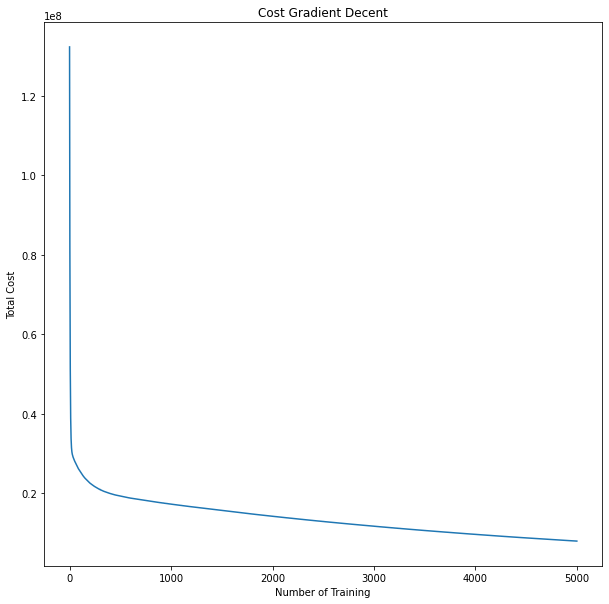

In [28]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.title('Cost Gradient Decent')
plt.ylabel('Total Cost')
plt.xlabel('Number of Training')
plt.show()

In [30]:
print("%20s %20s " % ('Step', 'Cost')+'\n')
for step in range(learning_epochs):
    if step % 100 == 0:
        cost_val = history.history['loss'][step]
        print("%20i %20.5f" % (step, cost_val))

                Step                 Cost 

                   0      132323976.00000
                 100       25642088.00000
                 200       22585816.00000
                 300       20940752.00000
                 400       19951722.00000
                 500       19301916.00000
                 600       18793520.00000
                 700       18371792.00000
                 800       17991804.00000
                 900       17627770.00000
                1000       17279424.00000
                1100       16946832.00000
                1200       16619262.00000
                1300       16297181.00000
                1400       15982510.00000
                1500       15677080.00000
                1600       15387931.00000
                1700       15078142.00000
                1800       14786804.00000
                1900       14504547.00000
                2000       14223546.00000
                2100       13947429.00000
                2200       13687

In [31]:
Time = 14 #@param {type:"slider", min:0, max:23, step:1}
Day = 3 #@param {type:"slider", min:0, max:6, step:1}

In [34]:
time_condition = data_out['집계시'] == Time
day_condition = data_out['요일'] == Day
selected_data = data_out[time_condition & day_condition]
print(selected_data)

거리   집계시  요일          135           407
101   14   3  6077.381503  15936.189655


              거리(km)                   실제                   예측                   차이

                 135          6077.381503          5529.924805                  547

                 407         15936.189655         15310.738281                  625



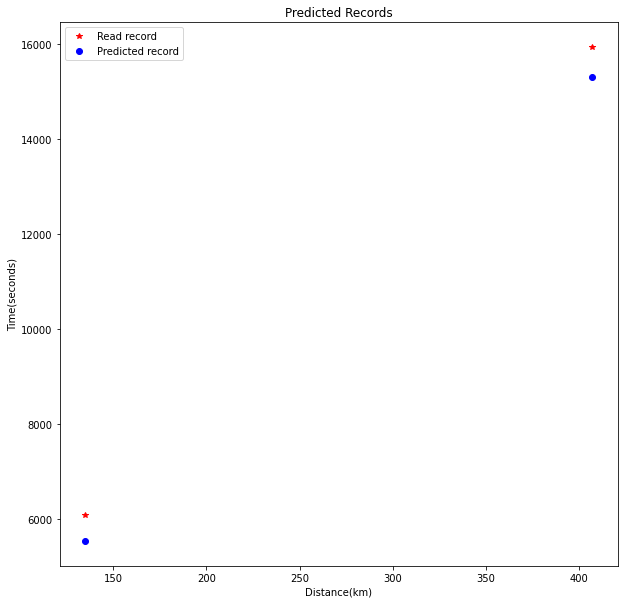

In [39]:
input = [ Time, Day ]
time = model.predict([input])
distance = [ 135, 407 ]

plt.figure(figsize=(10,10))
p_xdata, p_ydata = [], [] 
r_ydata = [selected_data[135], selected_data[407]]

print("%20s %20s %20s %20s" % ('거리(km)', '실제', '예측', '차이')+'\n')
for index in range(len(time[0])):
    dist_time = time[0][index]
    real_time = r_ydata[index]
    variation = real_time - dist_time
    p_xdata.append(distance[index])
    p_ydata.append(dist_time)
    print("%20d %20f %20f %20i" % (distance[index], real_time, dist_time, variation)+'\n')

plt.plot(p_xdata, r_ydata, 'r*', label='Read record')
plt.plot(p_xdata, p_ydata, 'bo', label='Predicted record')
plt.title('Predicted Records')
plt.ylabel("Time(seconds)")
plt.xlabel("Distance(km)")
plt.legend()
plt.show()